# Tools
* **Google Colab**: to share nootbooks easly and avoid configuration problems
* **Scikit Learn**: Simple and efficient tools for predictive data analysis

a


# Implementation

In [14]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score
from sklearn import preprocessing
import matplotlib.pyplot as plt

## Get Dataset
Download dataset from Github

In [15]:
def get_dataset(url):
  dataset = pd.read_csv(url, sep=';', header=None)
  # print(dataset.head())
  return dataset
label_column = 14

## Data preprocessing
Preparing data for Scikit Learn

### Transform data for sckit learn
Scikit does not support handling for categorical data, it is necessary to convert categorical features to a numerical representation

In [16]:
def transform_data(data, le, fit=False):
  categorical_cols = list(set(data.columns) - set(data._get_numeric_data().columns))
  len_cols = len(categorical_cols)
  for i in range(len_cols):
      cl = categorical_cols[i]
      if fit:
        data[cl] = le[cl].fit_transform(data[cl]) 
      else:
        data[cl] = le[cl].transform(data[cl]) 

  return data

### Split features and label

In [17]:
def split_data(data):
  y = data[label_column]
  X = data.drop([label_column], axis=1)

  return(X, y)

## Train
Two methods were chosen, K-Nearest Neighbors (KNN) and Random Forest (RF), as both are very popular

Set parameters is a bit tricky, it's most experience and a lot of *Trial-and-error*. 


**RF Parameters**
- min_samples_leaf : guarantees a minimum number of samples in every leaf. At least 3 it's recomended to avoid outliers leaf. This control the tree depth, because nodes are expanded until all leaves contain less than min_samples_split samples
- n_estimators: The number of trees in the forest, collect and orginze the sample widely
- min_samples_split: To split a node at least 5 samples are needed. Does not allow each sample to be a branch.
```
parameters_rf = {
              'min_samples_leaf': 3, # The minimum number of samples required to be at a leaf node. 
              'n_estimators': 20, # The number of trees in the forest. High numb
              'min_samples_split': 5,}
```

**KNN Parameters**
Look for 5 nearest Neighbors, is recomended to use a prime number. 
```
parameters_knn = {
      'n_neighbors' : 5
  }
```


**Cross Validation**

Learning the parameters of a prediction function and testing it on the same data is a mistake. This situation is called overfitting. 

To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. 

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation. The training set is split into k smaller sets. The following procedure is followed for each of the k “folds”:

- A model is trained using *k-1* of the folds as training data;

- The resulting model is validated on the remaining part of the data. This approach can be computationally expensive, but does not waste too much data.

Based on the previous explanation the procedure, Cross Validation, it's selected to train the classifiers.

Classifier: Random Forest


Confusion matrix, without normalization
[[15486   390]
 [ 1263  3645]]
-------------------------------
Normalized confusion matrix
[[0.97543462 0.02456538]
 [0.25733496 0.74266504]]
-------------------------------


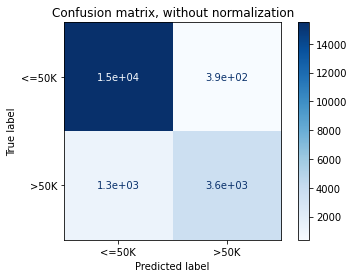

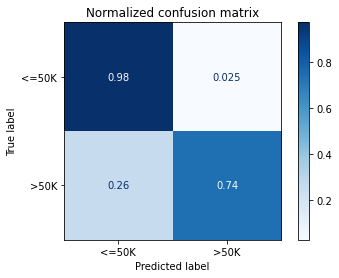


Random Forest
Accuracy: 0.8672536566589685
Recal: 0.6132844335778321
F1 score: 0.6857273037931427


-------------


Classifier: Nearest Neighbors


Confusion matrix, without normalization
[[15117   759]
 [ 2515  2393]]
-------------------------------
Normalized confusion matrix
[[0.95219199 0.04780801]
 [0.51242869 0.48757131]]
-------------------------------


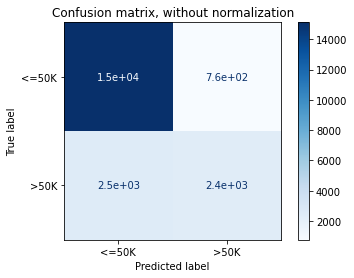

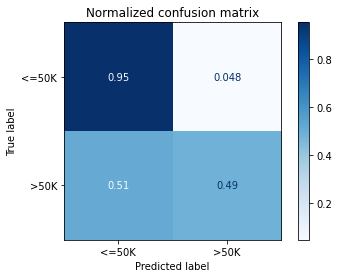


Nearest Neighbors
Accuracy: 0.7771362586605081
Recal: 0.3235533822330888
F1 score: 0.40676229508196715


-------------




In [18]:
def train_scikit():
  dataset = get_dataset(url = 'https://raw.githubusercontent.com/rfmorera/Font10-Test/master/adultoclase.csv')

  label_encoders = [preprocessing.LabelEncoder() for i in range(len(dataset.columns))]
  data = transform_data(dataset, label_encoders, fit=True)

  (train_X, train_y) = split_data(data)

  names = ["Random Forest", "Nearest Neighbors"]
  
  parameters_rf = {
              'min_samples_leaf': 3,
              'n_estimators': 20, 
              'min_samples_split': 5,
              }

  parameters_knn = {
      'n_neighbors' : 5
  }

  classifiers = [
                RandomForestClassifier(**parameters_rf),
                KNeighborsClassifier(**parameters_knn)
  ]

  class_names = label_encoders[label_column].classes_
  titles_options = [("Confusion matrix, without normalization", None),
                    ("Normalized confusion matrix", 'true')]

  for name, clf in zip(names, classifiers):

    clf.fit(train_X, train_y)
    predictions = cross_val_predict(clf, train_X, train_y, cv=8)

    print("Classifier: {0}\n\n".format(name))
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(clf, train_X, train_y,
                                    display_labels=class_names,
                                    cmap=plt.cm.Blues,
                                    normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)
        print("-------------------------------")

    plt.show()
    accuracy = accuracy_score(train_y ,predictions)
    recall = recall_score(train_y ,predictions)
    f1 = f1_score(train_y, predictions)
    print("\n{0}\nAccuracy: {1}\nRecal: {2}\nF1 score: {3}".format(name, accuracy, recall, f1))
    print("\n\n-------------\n\n")

  return (classifiers, label_encoders)

([RF_model, KNN_model], label_encoders) = train_scikit()

## Results

Both classifiers show a good accuracy, above 0.75 but RF is better with 0.86, approximately. A much better way to evaluate the performance of a classifier is to look at the confusion matrix. 

Both classifiers tend to misclasify object of *>50K*. According to this metric RF is better than KNN. 

There are many other metrics, personally I prefer to use the F1, it is the harmonic mean of precision and recall,  to simply compare two classifiers. 

```
Random Forest (RF)
Accuracy: 0.8672536566589685
Recal: 0.6132844335778321
F1 score: 0.6857273037931427
```

```
Nearest Neighbors (KNN)
Accuracy: 0.7771362586605081
Recal: 0.3235533822330888
F1 score: 0.40676229508196715
```

Clearly RF is better by far than KNN in this context.

## Prediction
Test purpose. Takes raw data transform it and evaluate in **cls** model. Finally decode the label (from numerical to categorical)

In [19]:
def predict_scikit(model, label_encoders, to_predict):
  data = transform_data(to_predict, label_encoders, fit=False)
  predc = model.predict(data)
  return label_encoders[label_column].inverse_transform(predc)

# Example of use


In [20]:
target = pd.DataFrame([[39,"State-gov",77516,"Bachelors",13,"Never-married","Adm-clerical","Not-in-family","White","Male",2174,0,40,"United-States"],
                       [37,"Private",280464,"Masters",13,"Married-civ-spouse","Exec-managerial","Husband","Black","Male",5178,0,80,"United-States"]])


prediction = predict_scikit(RF_model, label_encoders, target)
print(prediction)
prediction = predict_scikit(KNN_model, label_encoders, target)
print(prediction)

['<=50K' '>50K']
['<=50K' '<=50K']
